### Capstone Final Project 
### Author: Rashid Ali 
### Date: 19/7/2020

In [39]:
import numpy as np  
import pandas as pd
import folium
import datetime
import wget
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
import pygeoj
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

#### Acquire and Explore the data

In [2]:
baltimore = pd.read_csv("C:/Users/ali/Baltimore/BPD_Part_1_Victim_Based_Crime_Data.csv")

C:\Users\ali\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
baltimore.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,07/04/2020,10:26:00,4E,1100 N MOUNT ST,COMMON ASSAULT,I,NaN,724,WESTERN,SANDTOWN-WINCHESTER,-76.644567,39.301295,NaN,OTHER - INSIDE,NaN,1
1,07/04/2020,06:00:00,6E,2500 KEYWORTH AVE,LARCENY,O,NaN,533,NORTHERN,GREENSPRING,-76.659229,39.334650,NaN,STREET,NaN,1
2,07/04/2020,02:30:00,6D,3300 BRENDAN AVE,LARCENY FROM AUTO,O,NaN,432,NORTHEAST,BELAIR-EDISON,-76.567938,39.320964,NaN,STREET,Northeastern,1
3,07/04/2020,00:00:00,6D,RD & FRANKFORD AV,LARCENY FROM AUTO,O,NaN,443,NORTHEAST,NaN,-76.540424,39.320919,NaN,STREET,NaN,1
4,07/04/2020,05:40:00,7A,3600 CLIPPER MILL RD,AUTO THEFT,O,NaN,531,NORTHERN,HAMPDEN,-76.641382,39.331230,NaN,DRIVEWAY,NaN,1


In [6]:
baltimore.describe()

,Longitude,Latitude,Location 1,Total Incidents
count,303902.000000,303902.000000,0.0,307395.0
mean,-76.617477,39.306742,NaN,1.0
std,0.043738,0.029643,NaN,0.0
min,-81.529189,37.577262,NaN,1.0
25%,-76.649136,39.288176,NaN,1.0
50%,-76.614040,39.302721,NaN,1.0
75%,-76.586992,39.326927,NaN,1.0
max,-76.383228,39.661332,NaN,1.0


In [7]:
baltimore.shape

(307395, 16)

### Data wrangling

In [8]:
baltimore['Weapon'].fillna('NO WEAPON', inplace = True)

In [9]:
baltimore['CrimeDate']= pd.to_datetime(baltimore['CrimeDate'])

In [10]:
baltimore['Day'] = baltimore['CrimeDate'].dt.day
baltimore['Month'] = baltimore['CrimeDate'].dt.month
baltimore['Year'] = baltimore['CrimeDate'].dt.year
baltimore['Weekday'] = baltimore['CrimeDate'].dt.weekday + 1
#baltimore['Hour'] = baltimore['CrimeDate'].dt.hour

In [11]:
baltimore.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,Day,Month,Year,Weekday
0,2020-07-04,10:26:00,4E,1100 N MOUNT ST,COMMON ASSAULT,I,NO WEAPON,724,WESTERN,SANDTOWN-WINCHESTER,-76.644567,39.301295,NaN,OTHER - INSIDE,NaN,1,4,7,2020,6
1,2020-07-04,06:00:00,6E,2500 KEYWORTH AVE,LARCENY,O,NO WEAPON,533,NORTHERN,GREENSPRING,-76.659229,39.334650,NaN,STREET,NaN,1,4,7,2020,6
2,2020-07-04,02:30:00,6D,3300 BRENDAN AVE,LARCENY FROM AUTO,O,NO WEAPON,432,NORTHEAST,BELAIR-EDISON,-76.567938,39.320964,NaN,STREET,Northeastern,1,4,7,2020,6
3,2020-07-04,00:00:00,6D,RD & FRANKFORD AV,LARCENY FROM AUTO,O,NO WEAPON,443,NORTHEAST,NaN,-76.540424,39.320919,NaN,STREET,NaN,1,4,7,2020,6
4,2020-07-04,05:40:00,7A,3600 CLIPPER MILL RD,AUTO THEFT,O,NO WEAPON,531,NORTHERN,HAMPDEN,-76.641382,39.331230,NaN,DRIVEWAY,NaN,1,4,7,2020,6


In [12]:
baltimore = baltimore.set_index('CrimeDate')

#### Get Yearly Trend and Visualize it

In [13]:
crime_per_year= baltimore['Year'].value_counts().to_frame('crimes').reset_index()
yearly_crime= crime_per_year.rename(columns ={'index': 'year'})
yearly_crime = yearly_crime[yearly_crime['year'] > 2013].reset_index(drop=True)
yearly_crime.head(10)

,year,crimes
0,2017,52174
1,2016,48782
2,2018,48468
3,2015,48192
4,2019,46312
5,2014,45309
6,2020,18071


[]

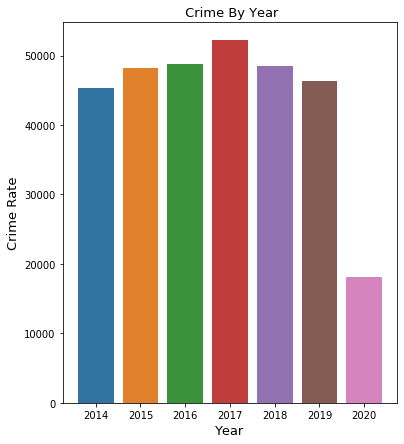

In [15]:
plt.figure(figsize=(6,7))

plt.title(' Crime By Year', fontsize=13)
ax = sns.barplot(x='year', y= 'crimes', data = yearly_crime)
plt.ylabel("Crime Rate", fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.plot()

#### Common crimes in Baltimore

In [18]:
common_crimes= baltimore['Description'].value_counts().to_frame('rate').reset_index()
common_crimes= common_crimes.rename(columns ={'index': 'crime'})
common_crimes=common_crimes.iloc[0:10]
common_crimes

,crime,rate
0,LARCENY,68577
1,COMMON ASSAULT,51096
2,BURGLARY,43921
3,LARCENY FROM AUTO,40468
4,AGG. ASSAULT,33830
5,AUTO THEFT,26994
6,ROBBERY - STREET,21650
7,ROBBERY - COMMERCIAL,5427
8,SHOOTING,4133
9,ROBBERY - RESIDENCE,3212


[]

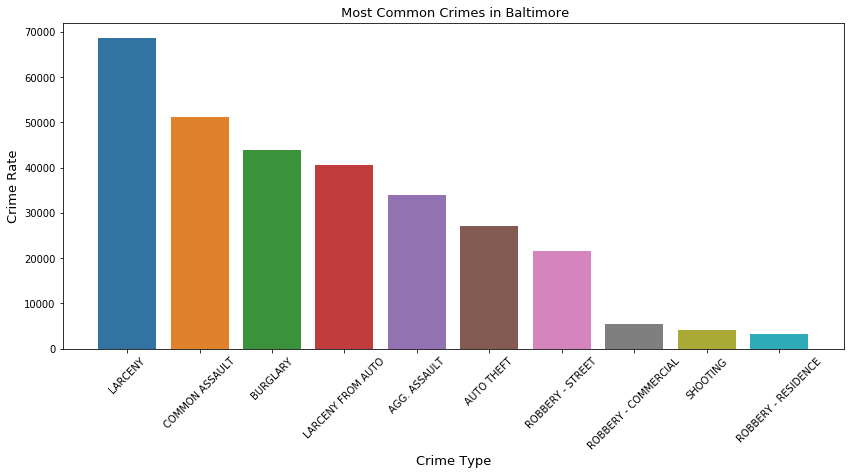

In [21]:
plt.figure(figsize=(14,6))
plt.title(' Most Common Crimes in Baltimore', fontsize=13)

ax = sns.barplot(x='crime', y= 'rate', data = common_crimes)
plt.ylabel("Crime Rate", fontsize=13)
plt.xlabel('Crime Type', fontsize=13)
plt.xticks(rotation=45)
plt.plot()

#### Crimes per region

In [22]:
region_crimes= baltimore['District'].value_counts().to_frame('rate').reset_index()
region_crimes= region_crimes.rename(columns ={'index': 'region'})
region_crimes = region_crimes[region_crimes['region']!= 'UNKNOWN'].reset_index(drop=True)
region_crimes

,region,rate
0,NORTHEAST,45940
1,SOUTHEAST,43380
2,CENTRAL,35462
3,SOUTHERN,34526
4,NORTHERN,33949
5,SOUTHWEST,31843
6,NORTHWEST,30348
7,EASTERN,26783
8,WESTERN,24545


[]

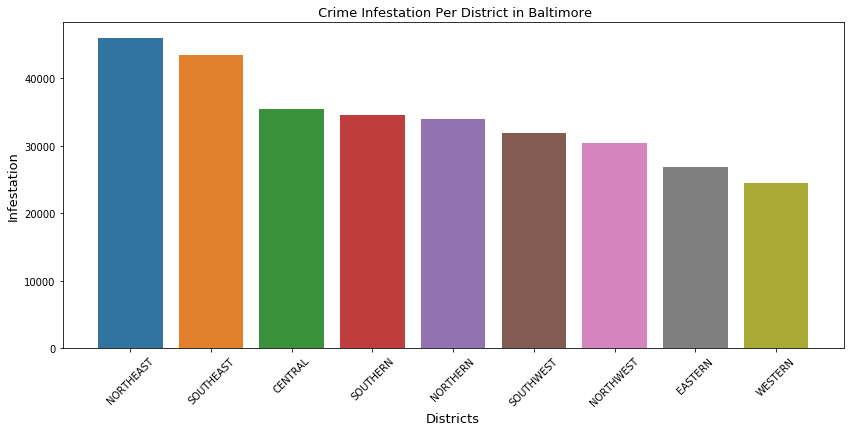

In [26]:
plt.figure(figsize=(14,6))
plt.title(' Crime Infestation Per District in Baltimore', fontsize=13)
ax = sns.barplot(x='region', y= 'rate', data = region_crimes)
plt.ylabel("Infestation", fontsize=13)
plt.xlabel('Districts', fontsize=13)
plt.xticks(rotation=45)
plt.plot()

#### cluster the regions

In [27]:
region_crimes_clustering = region_crimes.drop('region', 1)
region_crimes_clustering

,rate
0,45940
1,43380
2,35462
3,34526
4,33949
5,31843
6,30348
7,26783
8,24545


In [28]:
# set number of clusters
kclusters = 3

region_crimes_clustering = region_crimes.drop('region', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0)
kmeans.fit(region_crimes_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 0, 0, 0, 0, 0, 2, 2])

In [29]:
region_crimes_clustered= region_crimes.assign(cluster=kmeans.labels_)
region_crimes_clustered

,region,rate,cluster
0,NORTHEAST,45940,1
1,SOUTHEAST,43380,1
2,CENTRAL,35462,0
3,SOUTHERN,34526,0
4,NORTHERN,33949,0
5,SOUTHWEST,31843,0
6,NORTHWEST,30348,0
7,EASTERN,26783,2
8,WESTERN,24545,2


In [30]:
baltimore_mapped= baltimore[['District', 'Longitude', 'Latitude']]
b_mapped=baltimore_mapped.rename(columns={'District': 'region'})
b_mapped=b_mapped.reset_index()
b_mapped= b_mapped.drop('CrimeDate', 1)
#b_mapped= b_mapped.set_index('region')
b_mapped.head()

,region,Longitude,Latitude
0,WESTERN,-76.644567,39.301295
1,NORTHERN,-76.659229,39.334650
2,NORTHEAST,-76.567938,39.320964
3,NORTHEAST,-76.540424,39.320919
4,NORTHERN,-76.641382,39.331230


In [58]:
baltimore_folium= pd.merge(region_crimes_clustered, b_mapped.drop_duplicates('region'), on='region', how='inner' )
baltimore_folium.head(10)

,region,rate,cluster,Longitude,Latitude
0,NORTHEAST,45940,1,-76.567938,39.320964
1,SOUTHEAST,43380,1,-76.544564,39.287601
2,CENTRAL,35462,0,-76.613466,39.285077
3,SOUTHERN,34526,0,-76.614368,39.276819
4,NORTHERN,33949,0,-76.659229,39.334650
5,SOUTHWEST,31843,0,-76.677057,39.266628
6,NORTHWEST,30348,0,-76.658445,39.331355
7,EASTERN,26783,2,-76.578083,39.300148
8,WESTERN,24545,2,-76.644567,39.301295


#### Get districts Json data

In [55]:
ur = 'C:/Users/ali/Baltimore/BPD_Districts.geojson'
bj= pygeoj.load(filepath=ur)

In [56]:
baltimore_geo = bj # geojson file
baltimore_geo

#### Map the Districts

In [57]:
map_baltimore = folium.Map(location=[39.299236, -76.609383], zoom_start=11, attr='My Data Attribution')

cluster_1 = baltimore_folium[baltimore_folium['cluster'] == 1]
cluster_2 = baltimore_folium[baltimore_folium['cluster'] == 2]
cluster_0 = baltimore_folium[baltimore_folium['cluster'] == 0]
 
folium.GeoJson(baltimore_geo,    
      style_function = lambda x: {'fillColor': 'red' 
                                  if x['properties']['name'] in cluster_1.values                           
                                  else 'darkgreen' if x['properties']['name'] in cluster_2.values
                                  else 'yellow'
                                   }
       ).add_to(map_baltimore)

for lat, lon, region, cluster in zip(baltimore_folium['Latitude'], baltimore_folium['Longitude'], baltimore_folium['region'], baltimore_folium['cluster']):
    label = folium.Popup(str(region) + ' cluster: ' + str(cluster), parse_html=True)
   
    folium.Marker(
        [lat, lon],
        radius=5,
        popup=label,
        icon=folium.Icon(color='green'),
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_baltimore)

map_baltimore

#### Get safe neighborhoods

In [62]:
districts_neigh = baltimore[['District', 'Neighborhood','Longitude', 'Latitude']].reset_index()
districts_neigh = districts_neigh.drop('CrimeDate', axis=1)
districts_neigh.head()

,District,Neighborhood,Longitude,Latitude
0,WESTERN,SANDTOWN-WINCHESTER,-76.644567,39.301295
1,NORTHERN,GREENSPRING,-76.659229,39.334650
2,NORTHEAST,BELAIR-EDISON,-76.567938,39.320964
3,NORTHEAST,NaN,-76.540424,39.320919
4,NORTHERN,HAMPDEN,-76.641382,39.331230


In [63]:
safe_districts = ['EASTERN', 'WESTERN']
safe_Neighborhoods = districts_neigh[districts_neigh['District'].isin(safe_districts)]
safe_Neighborhoods= safe_Neighborhoods.drop('District', axis=1)
safe_Neighborhoods= safe_Neighborhoods.dropna()
safe_Neighborhoods.head()

,Neighborhood,Longitude,Latitude
0,SANDTOWN-WINCHESTER,-76.644567,39.301295
6,HARLEM PARK,-76.639986,39.295319
12,MADISON EASTEND,-76.578083,39.300148
28,MOSHER,-76.662150,39.298075
37,SOUTH CLIFTON PARK,-76.589462,39.312452


In [64]:
safe_Neighborhoods.shape

(48977, 3)

#### Get venues using foursquare

In [65]:
CLIENT_ID = 'GCQEGNKGILQD04XMOFAW22Z5LY30VTWDWR1QFNH3QNYNOS4M' # your Foursquare ID
CLIENT_SECRET = 'I2JBE0DHAXSIBKXSFRR1TLPLKRXPOBV0ECKSBQMENEA3FAOL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [66]:
neighborhood_latitude = safe_Neighborhoods.loc[6, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = safe_Neighborhoods.loc[6, 'Longitude'] # neighborhood longitude value
neighborhood_name = safe_Neighborhoods.loc[6, 'Neighborhood'] # neighborhood name
print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of HARLEM PARK are 39.295318949856, -76.639985543469.


In [67]:
LIMIT = 100  
radius = 500      

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit{}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url  

'https://api.foursquare.com/v2/venues/explore?&client_id=GCQEGNKGILQD04XMOFAW22Z5LY30VTWDWR1QFNH3QNYNOS4M&client_secret=I2JBE0DHAXSIBKXSFRR1TLPLKRXPOBV0ECKSBQMENEA3FAOL&v=20180605&ll=39.295318949856,-76.639985543469&radius=500&limit100'

In [68]:
results = requests.get(url).json()
#results

In [69]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [70]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues = nearby_venues.rename(columns={'venue.name': 'venue','venue.categories': 'category','venue.location.lat':'lat','venue.location.lng':'lng'})

nearby_venues.head()

,venue,category,lat,lng
0,Shareef's Grill,American Restaurant,39.294184,-76.638196
1,Lafayette Square Park,Park,39.298028,-76.635910
2,Harlem Park,Park,39.296098,-76.641376
3,Harlem Park Pl,Playground,39.296684,-76.640016
4,The Hide Out,Bar,39.295032,-76.644929


In [71]:
nearby_venues.shape

(5, 4)

#### Join neighborhood and venues

In [72]:
harlem_park = safe_Neighborhoods[safe_Neighborhoods['Neighborhood']=='HARLEM PARK']
harlem_park = harlem_park.iloc[0:5].reset_index()
harlem_park = harlem_park.drop('index', 1)
harlem_park 

,Neighborhood,Longitude,Latitude
0,HARLEM PARK,-76.639986,39.295319
1,HARLEM PARK,-76.633312,39.296943
2,HARLEM PARK,-76.632678,39.295967
3,HARLEM PARK,-76.646465,39.297514
4,HARLEM PARK,-76.645779,39.296493


In [73]:
harlem_park_venues = pd.concat([harlem_park, nearby_venues], axis=1)
harlem_park_venues

,Neighborhood,Longitude,Latitude,venue,category,lat,lng
0,HARLEM PARK,-76.639986,39.295319,Shareef's Grill,American Restaurant,39.294184,-76.638196
1,HARLEM PARK,-76.633312,39.296943,Lafayette Square Park,Park,39.298028,-76.635910
2,HARLEM PARK,-76.632678,39.295967,Harlem Park,Park,39.296098,-76.641376
3,HARLEM PARK,-76.646465,39.297514,Harlem Park Pl,Playground,39.296684,-76.640016
4,HARLEM PARK,-76.645779,39.296493,The Hide Out,Bar,39.295032,-76.644929
